<a href="https://colab.research.google.com/github/31grudnia/Deep-Learning-Projects/blob/4-Stock-Price-Prediction/DL_4_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from datetime import datetime, timedelta

In [ ]:
today = datetime.today().strftime("%Y-%m-%d")
df = yf.download('AAPL',
                 start = '2012-01-01', 
                 end = today)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.482926,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.550011,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.689342,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.821991,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.801655,394024400
...,...,...,...,...,...,...
2023-05-19,176.389999,176.389999,174.940002,175.160004,175.160004,55772400
2023-05-22,173.979996,174.710007,173.449997,174.199997,174.199997,43570900
2023-05-23,173.130005,173.380005,171.279999,171.559998,171.559998,50747300


In [ ]:
df.shape

(2868, 6)

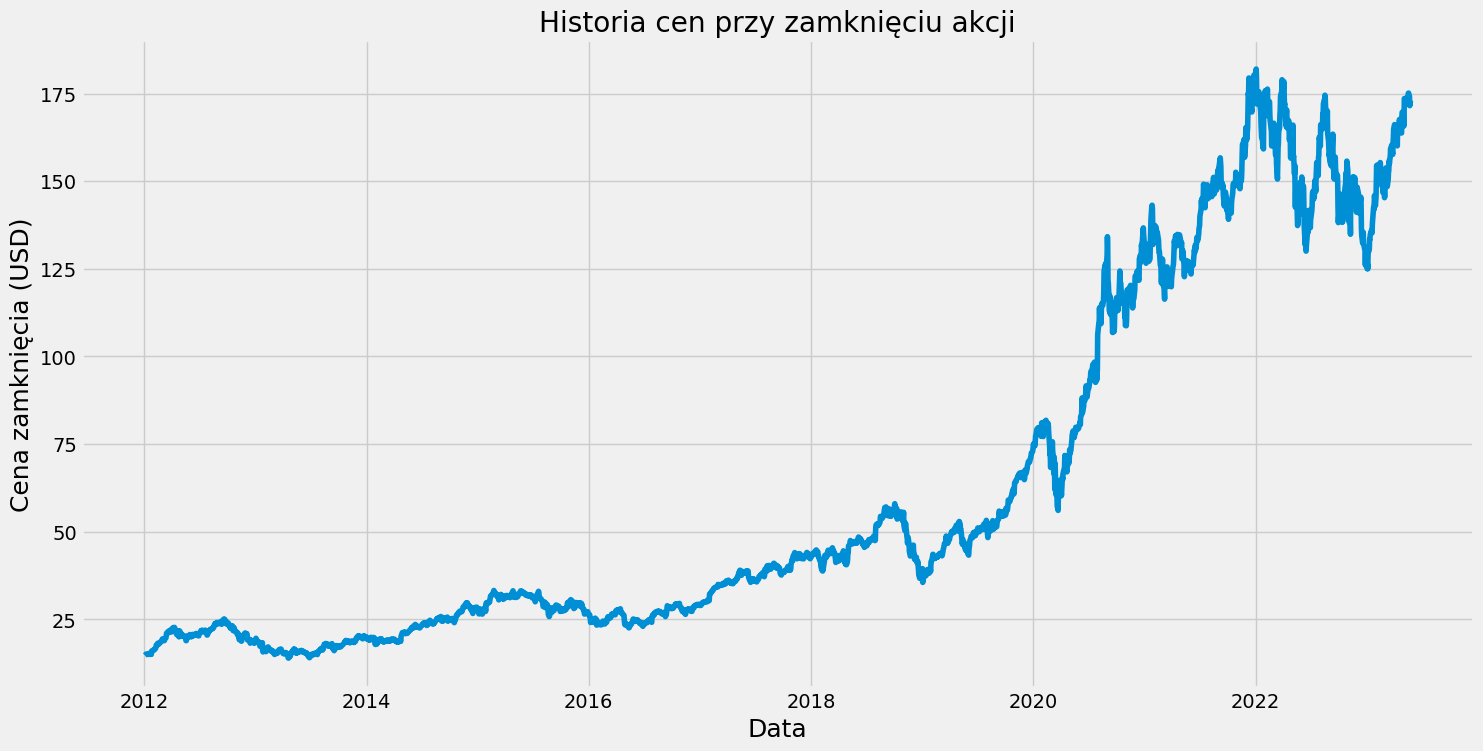

In [ ]:
plt.figure(figsize = (16, 8))
plt.title("Historia cen przy zamknięciu akcji")
plt.plot(df['Close'])
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Cena zamknięcia (USD)', fontsize = 18)
plt.show()

In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2295

**Skalowanie danych**

In [ ]:
# Skalowanie danych
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.93782077],
       [0.93948681],
       [0.94632955]])

In [ ]:
# Stworzenie przeskalowanych danych treningowych
train_data = scaled_data[0:training_data_len, :]
# Podział danych na podzbniory: x_train i y_train
X_train = []  # X_train to niezależne dane treningowe
Y_train = []  # Y_train to zależne dane 

for i in range(60, len(train_data)):
  X_train.append(train_data[i-60:i, 0])
  Y_train.append(train_data[i, 0])
  if i <= 61:
    print(X_train)
    print(Y_train)
    print()

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [ ]:
# Stworzenie przeskalowanych danych testowych
test_data = scaled_data[training_data_len - 60: , : ]
X_test = []
Y_test = dataset[training_data_len: , : ]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60:i, 0])

In [ ]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [ ]:
X_test = np.array(X_test)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(f'Po: {X_train.shape}')

Po: (2235, 60, 1)


In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(f'Po: {X_test.shape}')

Po: (573, 60, 1)


**Model LSTM**


In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(X_train, Y_train, batch_size = 1, epochs = 1)

2235/2235 [==============================] - 75s 33ms/step - loss: 3.0213e-04


**Predykcja**

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

18/18 [==============================] - 0s 17ms/step


**Średnia kwadratowa błedów - im bliżej zera tym lepiej**

In [ ]:
rmse = np.sqrt(np.mean(((predictions - Y_test)**2)))
print(f'RMSE: {rmse}')

RMSE: 4.511559891008586


<ipython-input-37-0455583ed9d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


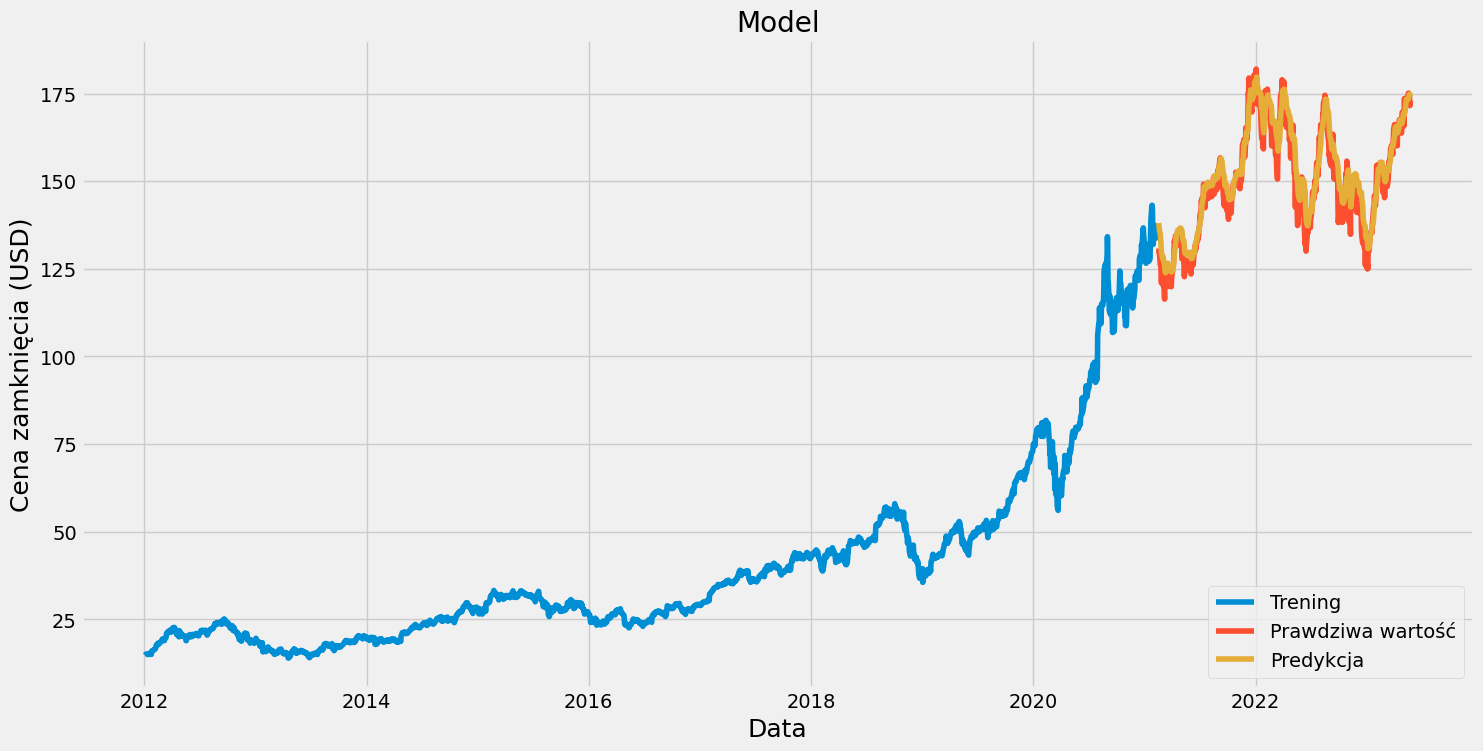

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize = (16, 8))
plt.title("Model")
plt.xlabel("Data", fontsize = 18)
plt.ylabel('Cena zamknięcia (USD)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Trening', 'Prawdziwa wartość', 'Predykcja'], loc='lower right')
plt.show()

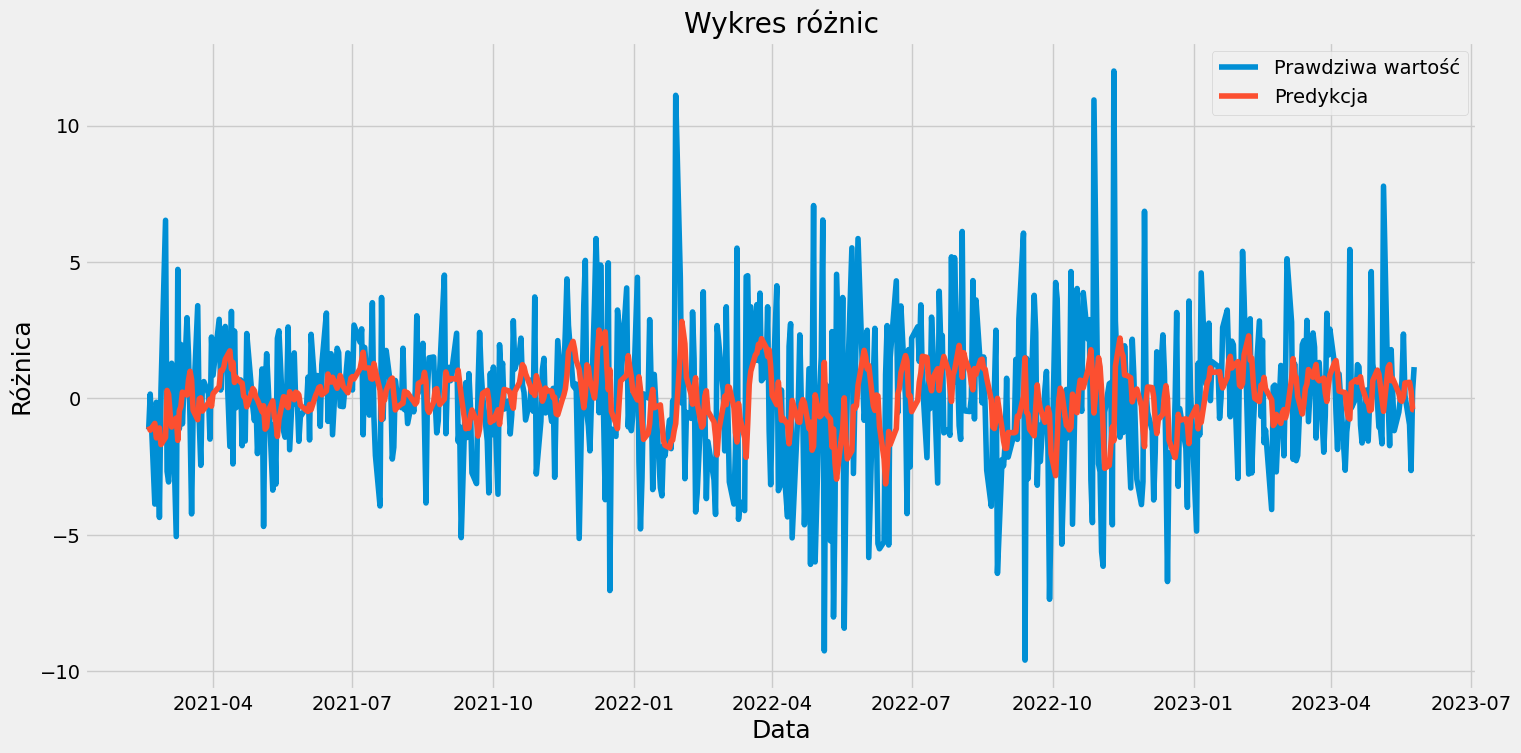

In [ ]:
plt.figure(figsize = (16, 8))
plt.title("Wykres różnic")
plt.xlabel("Data", fontsize = 18)
plt.ylabel('Różnica', fontsize = 18)
plt.plot(valid.diff(), label = ['Prawdziwa wartość', 'Predykcja'])
plt.legend()

In [ ]:
valid

,Close,Predictions
Date,,
2021-02-17,130.839996,135.733017
2021-02-18,129.710007,133.426025
2021-02-19,129.869995,132.256622
2021-02-22,126.000000,132.399719
2021-02-23,125.860001,129.011398
...,...,...
2023-05-19,175.160004,175.900101
2023-05-22,174.199997,175.981567
2023-05-23,171.559998,174.965652


**Predykcja 7 dni na podstawie 3 miesięcy wstecz**

In [ ]:
from datetime import datetime, timedelta

appl = yf.download('AAPL',
                 start = '2012-01-01', 
                 end = today)
new_df = appl.filter(['Close'])

last_90_days = new_df[-90:].values
last_90_days_scaled = scaler.transform(last_90_days)

X_test = []
X_test.append(last_90_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_prices = []
days_to_predict = 7

for _ in range(days_to_predict):
    predicted_price = model.predict(X_test)
    X_test = np.append(X_test[:, 1:, :], 
                       predicted_price.reshape(1, 1, 1), 
                       axis=1)
    predicted_prices.append(scaler.inverse_transform(predicted_price))
    
start_date = datetime.strptime(today, '%Y-%m-%d')
dates = [start_date + timedelta(days=i) for i in range(1, days_to_predict + 1)]

for date, price in zip(dates, predicted_prices):
    print(f"{date.strftime('%Y-%m-%d')}: {price[0]}")



[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 46ms/step
2023-05-27: [174.08159]
2023-05-28: [175.12822]
2023-05-29: [175.99606]
2023-05-30: [176.69432]
2023-05-31: [177.27512]
2023-06-01: [177.78629]
2023-06-02: [178.25964]


In [ ]:
appl = yf.download('AAPL',
                 start = '2023-05-25')
print(appl['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2023-05-25    172.990005
Name: Close, dtype: float64


In [ ]:
#from tensorflow.keras.models import load_model
#model.save('/content/drive/MyDrive/Colab Notebooks/modele-do-zapisania/action-price-prediction-model-2.sav')

In [ ]:
# filename = 'action-price-prediction-model-2.sav'
# pickle.dump(model, open(filename, 'wb'))

# **API**

In [ ]:
!pip install fastapi
!pip install uvicorn
!pip install pickle5
!pip install pydantic
!pip install scikit-learn
!pip install requests
!pip install pypi-json
!pip install pyngrok
!pip install nest-asyncio
!pip install datetime

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import pickle
import json
import uvicorn
from pyngrok import ngrok
from fastapi.middleware.cors import CORSMiddleware
import nest_asyncio
from apscheduler.schedulers.background import BackgroundScheduler

In [ ]:
app = FastAPI()

origins = ["*"]

app.add_middleware(
    CORSMiddleware,
    allow_origins=origins,
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

In [ ]:
action_prediction_model = pickle.load(open('action-price-prediction-model-2.sav', 'rb'))

In [ ]:
from fastapi.encoders import jsonable_encoder
from datetime import datetime, timedelta

@app.post('/')
def action_prediction():
  
  scheduler = BackgroundScheduler()
  scheduler.add_job(action_prediction, 'interval', days=1, start_date='2023-05-27 10:00:00')
  scheduler.start()

  today = datetime.today().strftime("%Y-%m-%d")
  scaler = MinMaxScaler(feature_range = (0, 1))

  appl = yf.download('AAPL',
                 start = '2012-01-01', 
                 end = today)
  new_df = appl.filter(['Close'])

  last_90_days = new_df[-90:].values
  last_90_days_scaled = scaler.transform(last_90_days)

  X_test = []
  X_test.append(last_90_days_scaled)
  X_test = np.array(X_test)
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

  predicted_prices = []
  days_to_predict = 7

  for _ in range(days_to_predict):
    predicted_price = model.predict(X_test)
    X_test = np.append(X_test[:, 1:, :], 
                        predicted_price.reshape(1, 1, 1), 
                        axis=1)
    predicted_prices.append(scaler.inverse_transform(predicted_price))
      
  start_date = datetime.strptime(today, '%Y-%m-%d')
  dates = [start_date + timedelta(days=i) for i in range(1, days_to_predict + 1)]

  result = {}

  for date, price in zip(dates, predicted_prices):
    # return jsonable_encoder({date.strftime('%Y-%m-%d'): price[0]})
    return {f"{date.strftime('%Y-%m-%d')}": f"{price[0]}"}

    

In [ ]:
ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)